In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

print(tf.__version__)


1.14.0


In [104]:
model = keras.models.load_model('/home/falcon/garbageai/model/keras_modelds3.h5')

In [105]:
#Retreive Images
test_dir = '/home/falcon/garbageai/testfinal'
image_count = len(os.listdir(test_dir))



In [106]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = ImageDataGenerator(rescale=1./255)
print(image_count)

3


In [107]:
BATCH_SIZE = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)


In [108]:
test_data_gen = image_generator.flow_from_directory(directory=test_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                    class_mode = 'binary')
sample_images, _ = next(test_data_gen)


Found 14 images belonging to 3 classes.


In [109]:
predictions = model.predict(test_data_gen)

In [110]:
for i in range(13): 
    if predictions[i][0] < 0.5: #metal/paper < 0.68 #metal/plastic <0.3 #paper/plastic <0.25
        print("paper") 
    else:
        print("plastic")

paper
paper
plastic
plastic
paper
paper
plastic
plastic
paper
plastic
plastic
plastic
paper


In [111]:
predictions[0]

array([0.37438703], dtype=float32)

In [112]:
print(predictions)
print(np.mean(predictions))

[[0.37438703]
 [0.15893722]
 [0.5446325 ]
 [0.5205618 ]
 [0.4321339 ]
 [0.45871788]
 [0.6749095 ]
 [0.5355115 ]
 [0.313348  ]
 [0.5146692 ]
 [0.604256  ]
 [0.5993888 ]
 [0.21094385]
 [0.4994984 ]]
0.46013537


In [63]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show() 

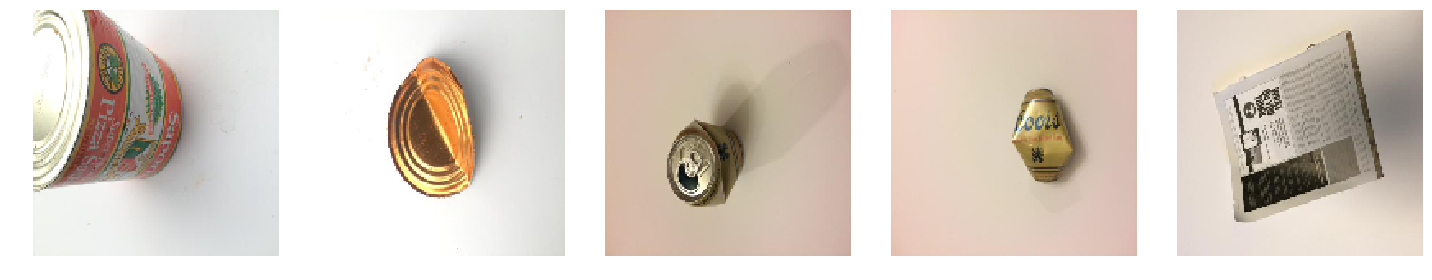

In [64]:
plotImages(sample_images[0:5])

AttributeError: 'tuple' object has no attribute 'read'